## EXPLORATORY DATA ANALYSIS

#### OBJECTIVE: To perform 'Exploratory Data Analysis' on dataset 'Indian Premier League Auction'

#### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

### About Dataset 
#### (Datase Source: Kaggle)
Welcome to the IPL 2023 Auction dataset, a comprehensive compilation of data capturing the high-stakes player auctions in the cricketing world. This dataset contains the details of the IPL 2023 auction and the player's status for the next IPL edition.

Attributes:

names: Names of the players.

player style: This represents the playing style of the player (Bowler, Batter, AllRounder, WK-Batter).

nationality: This represents the nationality of the player.

base price (in lacs): This column represents the base price of the player. The values are in lacs.

final price (in lacs): This represents the final price of the player. The values are in lacs.

franchise: This attribute contains the name of the franchise to which the player belongs
(CSK,MI,KKR,RR,LSG,DC,RCB,GT,SRH,PBKS).

status: This represents the status of players ( RETAINED, SOLD, UNSOLD).

This dataset can be used to analyze the player availability for each franchise and can be used to get insights about the demands based on the player style.

In [2]:
### Reading csv file 
ipl_df = pd.read_csv("C:/Users/raghu/My files/DSE/Study materials/Personal Projects/EDA Projects/IPL Auction/iplauction2023.csv")

# display data
ipl_df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


# Data Dimention

In [3]:
ipl_df.shape

(309, 7)

#### We can see the dataframe has 7 columns and 309 observations.

# Data Definition

In [4]:
ipl_df.dtypes

name                      object
player style              object
nationality               object
base price (in lacs)     float64
final price (in lacs)    float64
franchise                 object
status                    object
dtype: object

In [5]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


#### From above data, we see that the data type of 'base price (in lacs)', 'final price (in lacs)'  is 'float64' i.e Numerical data. All other columns are Categorical data ('Object' - data type)

# Summary Statistics

In [6]:
# descriptive statistics - Numerical data
ipl_df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [7]:
# descriptive statistics - Categoricsl data

ipl_df.describe(include="object")

,name,player style,nationality,franchise,status
count,309,309,309,238,309
unique,309,4,14,10,3
top,Harshit Rana,Bowler,India,RR,RETAINED
freq,1,111,201,25,158


# Checking for missing values

In [8]:
Total = ipl_df.isnull().sum().sort_values(ascending=False)

Percent=(ipl_df.isnull().sum().sort_values(ascending=False))*100/len(ipl_df)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    

missing_data

,Total,Percentage of Missing Values
base price (in lacs),158,51.132686
final price (in lacs),71,22.977346
franchise,71,22.977346
name,0,0.000000
player style,0,0.000000
nationality,0,0.000000
status,0,0.000000


<function matplotlib.pyplot.show(close=None, block=None)>

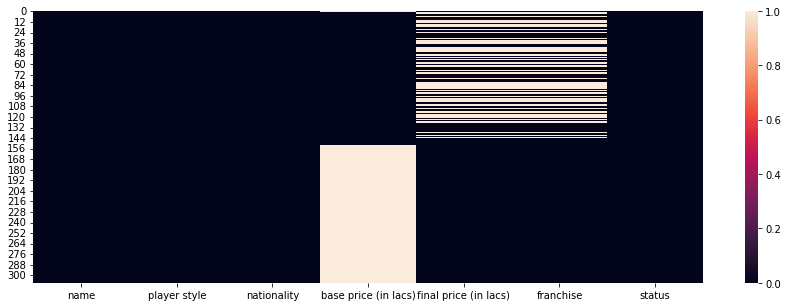

In [9]:
# set the figure size
plt.figure(figsize = (15,5))
sns.heatmap(ipl_df.isnull(),cbar="False")
plt.show

**Inference:**
* The features **'base price (in lacs)'** having 52% missing values and features **'final price (in lacs)', 'franchise'** are having 23% of missing values.
* We can impute **Mean** for **'base price (in lacs)','final price (in lacs)'** since they are numerical values


# Treating Missing Values

In [10]:
# 1.'base price (in lacs)'

In [11]:
ipl_df['status'].value_counts()

RETAINED    158
SOLD         80
UNSOLD       71
Name: status, dtype: int64

In [12]:
chk_df = ipl_df[ipl_df['base price (in lacs)'].isnull()]
chk_df['status'].value_counts()

RETAINED    158
Name: status, dtype: int64

In [13]:
# Replace missing values using the grouped mean
ipl_df['base price (in lacs)'] = ipl_df.groupby('name')['base price (in lacs)'].transform(lambda x: x.fillna(x.mean()))
# If still missing values present , replace it with median
ipl_df['base price (in lacs)'].replace(np.NaN,ipl_df['base price (in lacs)'].median(),inplace = True)

In [14]:
# 2.final price (in lacs)

In [15]:
chk_df = ipl_df[ipl_df['final price (in lacs)'].isnull()]
chk_df['status'].value_counts()

UNSOLD    71
Name: status, dtype: int64

In [16]:
# Since all these players are UNSOLD , replace all the missing values with 0

ipl_df['final price (in lacs)'].replace(np.NaN,0,inplace = True)

In [17]:
# 3.franchise

In [18]:
chk_df = ipl_df[ipl_df['franchise'].isnull()]
chk_df['status'].value_counts()

UNSOLD    71
Name: status, dtype: int64

In [19]:
# Since all these players are UNSOLD , replace all the missing values with 0

ipl_df['franchise'].replace(np.NaN,"NA",inplace = True)

In [20]:
# Re-checking Missing Values

<function matplotlib.pyplot.show(close=None, block=None)>

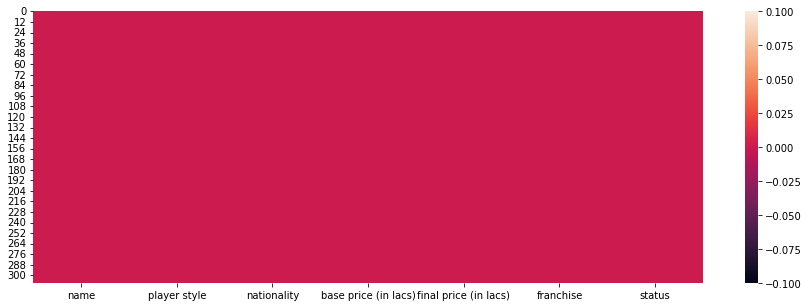

In [21]:
# set the figure size
plt.figure(figsize = (15,5))
sns.heatmap(ipl_df.isnull(),cbar="False")
plt.show

#### All Missing Values have been imputed

# Checking for Outliers

In [22]:
#Filtering only numerical features
df_num = ipl_df.select_dtypes(include=np.number)
df_num

,base price (in lacs),final price (in lacs)
0,20.0,20.0
1,20.0,0.0
2,75.0,0.0
3,150.0,150.0
4,100.0,100.0
...,...,...
304,20.0,1200.0
305,20.0,800.0
306,20.0,600.0
307,20.0,1600.0


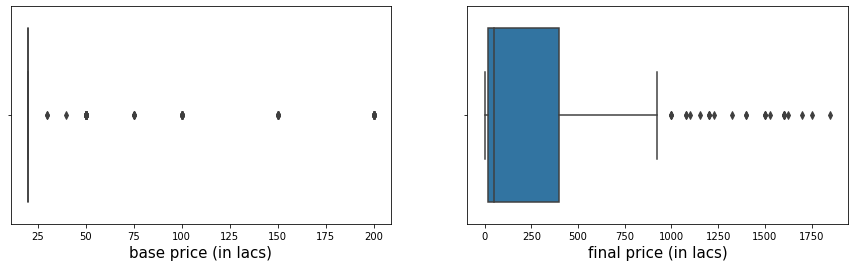

In [23]:
fig,ax = plt.subplots(1,2,figsize=(15,4))

for var,ax in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(df_num[var],ax=ax)
    z.set_xlabel(var,fontsize=15)

**Inferrence:**
* We can witness some of the observations present in more than 1.5 times IQR Range. But we cannot surely tell those extreme observations are potential outliers. Beacause base price and final price based on player and bedding.

# Univariate & Multivariate Analysis

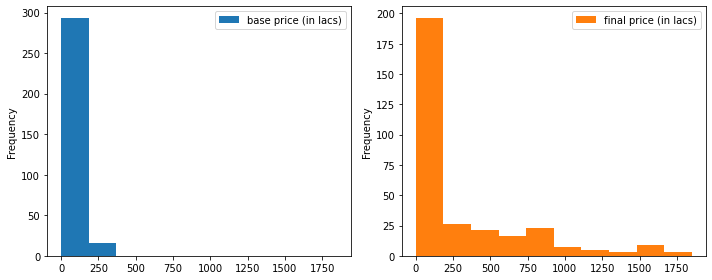

In [24]:
# Distribution of numerical features

df_num.plot.hist(subplots= True, layout=(1,2),figsize = (10,4),sharex =True,sharey=False)

plt.tight_layout()

plt.show()

**Inferrence:**
* From the histogram, we can tell that both of the features base price and final price is positively skewed

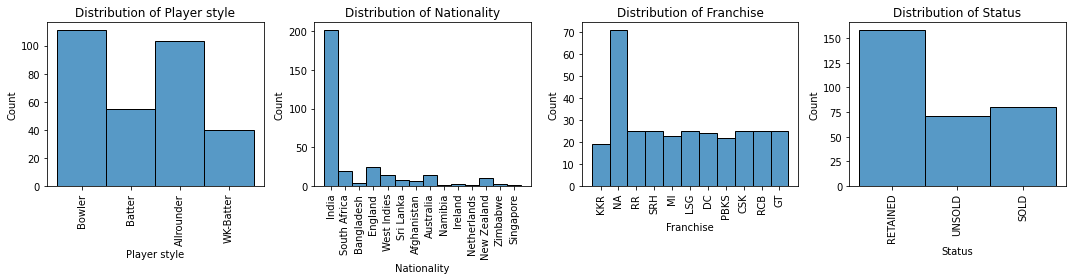

In [25]:
# Distribution of categorical features

df_cat = ipl_df.select_dtypes(include='object')

columns_to_plot = ['player style', 'nationality', 'franchise', 'status']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(df_cat[column], ax=axes[i])
    axes[i].set_title(f"Distribution of {column.capitalize()}")
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [26]:
ipl_df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

# Base price vs Final price

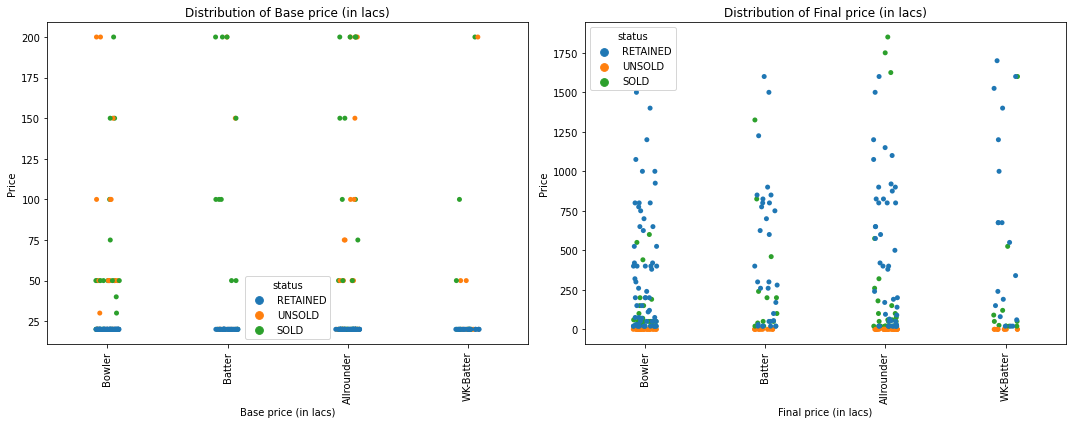

In [27]:
columns_to_plot = ['base price (in lacs)','final price (in lacs)']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.stripplot(x ="player style" , y = column , hue = "status" , data = ipl_df, ax=axes[i])
    axes[i].set_title(f"Distribution of {column.capitalize()}")
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel("Price")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Inferrence:**
* From the above strip plot, It is evident that base price of Retained Players are low, but when it comes to Final price they are the highest.

# Top 10 - High Demand Players

                name  final price (in lacs)
225       Sam Curran                 1850.0
39     Cameron Green                 1750.0
106         KL Rahul                 1700.0
34        Ben Stokes                 1625.0
172  Nicholas Pooran                 1600.0
216     Rishabh Pant                 1600.0
207  Ravindra Jadeja                 1600.0
220     Rohit Sharma                 1600.0
85      Ishan Kishan                 1525.0
74     Hardik Pandya                 1500.0


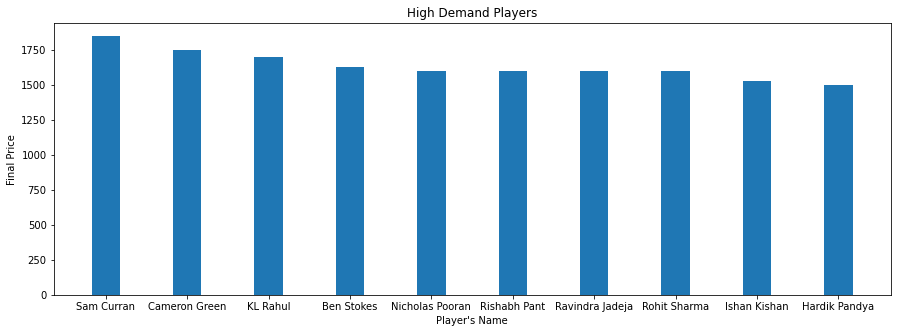

In [29]:
fig,ax = plt.subplots(1,1,figsize=(15,5))

top10_ply = ipl_df.groupby("name", as_index=False)["final price (in lacs)"].sum()
top10_ply1 = top10_ply.sort_values('final price (in lacs)', ascending=False)[:10]

plt.bar(x=top10_ply1["name"],height=top10_ply1["final price (in lacs)"],width = 0.35)

plt.xlabel("Player's Name")
plt.ylabel("Final Price")
plt.title("High Demand Players")

print(top10_ply1.head(10))
plt.show()

**Insight**
* Sam Curran , Cameron Green & KL Rahul are the high demand players

# Top 5 - Franchise which purchased player at High Price

  franchise  final price (in lacs)
5        MI                 9420.0
0       CSK                 9350.0
8       RCB                 9325.0
9        RR                 9165.0
4       LSG                 9065.0


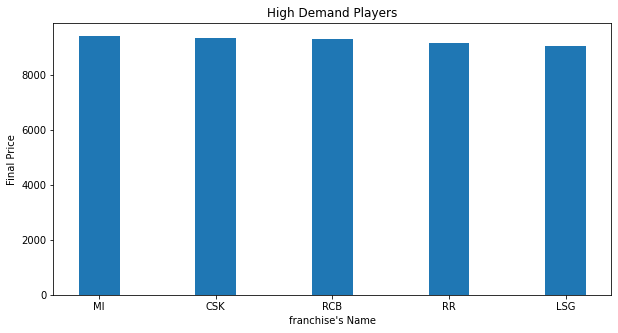

In [30]:
fig,ax = plt.subplots(1,1,figsize=(10,5))

top5_fc = ipl_df.groupby("franchise", as_index=False)["final price (in lacs)"].sum()
top5_fc1 = top5_fc.sort_values('final price (in lacs)', ascending=False)[:5]

plt.bar(x=top5_fc1["franchise"],height=top5_fc1["final price (in lacs)"],width = 0.35)

plt.xlabel("franchise's Name")
plt.ylabel("Final Price")
plt.title("High Demand Players")

print(top5_fc1.head(10))
plt.show()

**Insight**
* MI, CSK & RCB are the teams which bought players at High price

# Top Players purchase by each Franchise

In [31]:
# function to plot bar chart
def plot_graph(col):
    plt.figure(figsize=(12, 6))
    data = df2[df2["franchise"]==col]
    sns.barplot(x="name",y="final price (in lacs)",data=data)

    plt.xlabel("Player Name")
    plt.ylabel("Final Price (in Lacs)")
    plt.title("Final Price (in Lacs) by" +" " + col)
    plt.show()

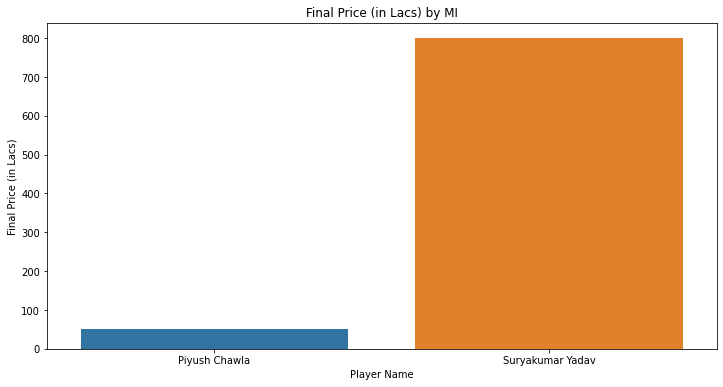

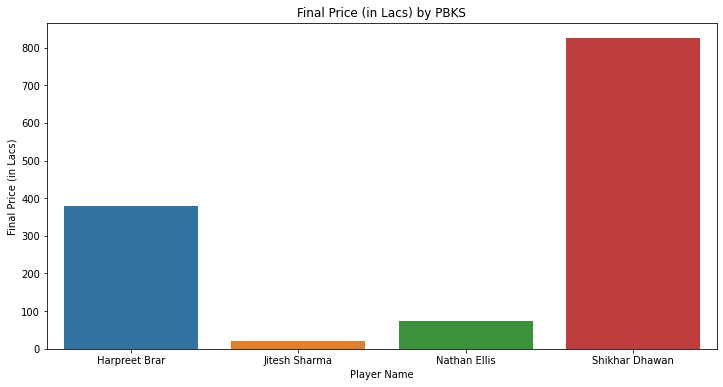

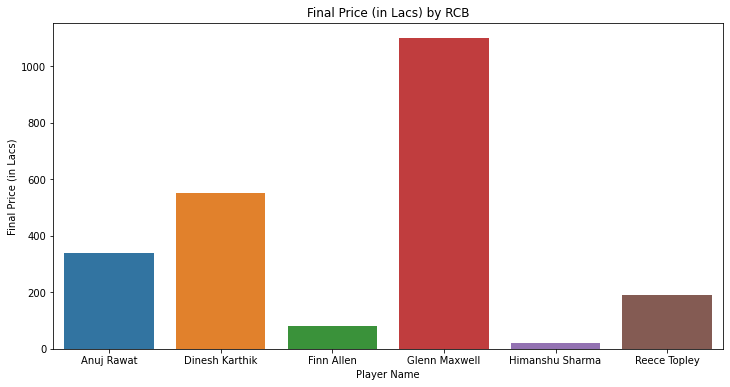

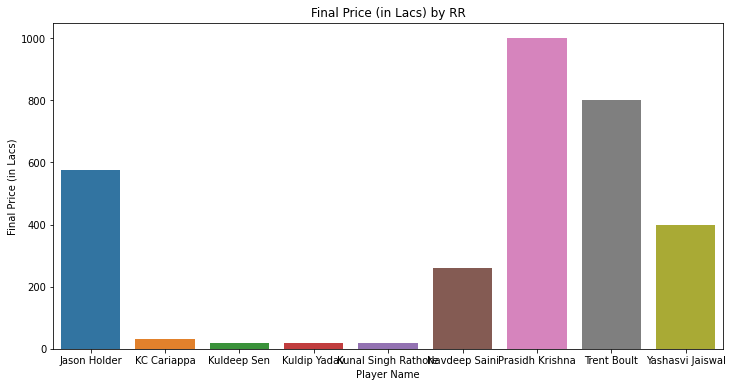

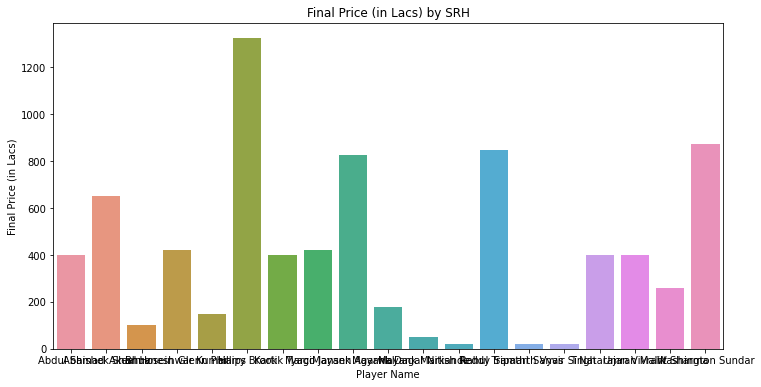

In [35]:
df = ipl_df.groupby(["franchise","name"])["final price (in lacs)"].sum()
df1 = df.reset_index()
df1['rank'] = ipl_df.groupby('franchise')['final price (in lacs)'].rank(ascending=False)
df2 = df1[df1["rank"]<=5]

fr = ['MI', 'PBKS', 'RCB', 'RR', 'SRH']
for i in fr:
    plot_graph(i)

In [34]:
df2.franchise.unique()

array(['MI', 'NA', 'PBKS', 'RCB', 'RR', 'SRH'], dtype=object)

# END